## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Описание данных

Данные для первой части:

    - Hypothesis — краткое описание гипотезы;

    - Reach — охват пользователей по 10-балльной шкале;

    - Impact — влияние на пользователей по 10-балльной шкале;

    - Confidence — уверенность в гипотезе по 10-балльной шкале;

    - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

    - transactionId — идентификатор заказа;
    
    - visitorId — идентификатор пользователя, совершившего заказ;

    - date — дата, когда был совершён заказ;

    - revenue — выручка заказа;

    - group — группа A/B-теста, в которую попал заказ.

    - date — дата;

    - group — группа A/B-теста;

    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

## Часть 1. Приоритизация гипотез.

In [2]:
hypo = pd.read_csv('/datasets/hypothesis.csv')
hypo.columns = hypo.columns.str.lower()
hypo.head(50)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypo.duplicated().sum() #дубликатов нет

0

Найдем ICE

In [4]:
hypo['ICE'] = (hypo['impact'] * hypo['confidence']) / hypo['efforts']
print(hypo[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                          hypothesis        ICE
8  Запустить акцию, дающую скидку на товар в день...  16.200000
0  Добавить два новых канала привлечения трафика,...  13.333333
7  Добавить форму подписки на все основные страни...  11.200000
6  Показать на главной странице баннеры с актуаль...   8.000000
2  Добавить блоки рекомендаций товаров на сайт ин...   7.000000
1  Запустить собственную службу доставки, что сок...   2.000000
5  Добавить страницу отзывов клиентов о магазине,...   1.333333
3  Изменить структура категорий, что увеличит кон...   1.125000
4  Изменить цвет фона главной страницы, чтобы уве...   1.000000


Перейдем к RICE

In [5]:
hypo['RICE'] = (hypo['reach'] * hypo['impact'] * hypo['confidence']) / hypo['efforts']
print(hypo[['hypothesis', 'RICE']].sort_values(by = 'RICE',ascending= False))

                                          hypothesis   RICE
7  Добавить форму подписки на все основные страни...  112.0
2  Добавить блоки рекомендаций товаров на сайт ин...   56.0
0  Добавить два новых канала привлечения трафика,...   40.0
6  Показать на главной странице баннеры с актуаль...   40.0
8  Запустить акцию, дающую скидку на товар в день...   16.2
3  Изменить структура категорий, что увеличит кон...    9.0
1  Запустить собственную службу доставки, что сок...    4.0
5  Добавить страницу отзывов клиентов о магазине,...    4.0
4  Изменить цвет фона главной страницы, чтобы уве...    3.0


### Вывод

При переходе от ICE к RICE можно заметить, что значения выросли в несколько раз, т.к. мы добавляем еще один множитель reach, т.е. охват пользователей, следовательно на 1-ое место перешла 7 гипотеза, т.к. её значения reach максимально большое, т.е. 10, соотвественно также изменился приоритет других гипотезы.

## Часть 2. Анализ A/B-теста.

### Предобработка данных

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
print(orders.head(20))
print(orders.info())

    transactionId   visitorId        date  revenue group
0      3667963787  3312258926  2019-08-15     1650     B
1      2804400009  3642806036  2019-08-15      730     B
2      2961555356  4069496402  2019-08-15      400     A
3      3797467345  1196621759  2019-08-15     9759     B
4      2282983706  2322279887  2019-08-15     2308     B
5       182168103   935554773  2019-08-15     2210     B
6       398296753  2900797465  2019-08-15     1860     B
7      2626614568    78758296  2019-08-15     1044     A
8      1576988021   295230930  2019-08-15    13710     A
9      1506739906  1882260405  2019-08-15     1855     B
10     3649131742   879864040  2019-08-15     4008     A
11     1919444843   927791387  2019-08-15     4499     B
12     2809384911  3213223594  2019-08-15     7370     A
13     3044797713   728063420  2019-08-15    11985     B
14     3859315276  1565034404  2019-08-15    10980     A
15     2550768810  2742574263  2019-08-15    15277     B
16     1820531107  2973109265  

In [7]:
visitors = pd.read_csv('/datasets/visitors.csv')
print(visitors.head(20))
print(visitors.info())

          date group  visitors
0   2019-08-01     A       719
1   2019-08-02     A       619
2   2019-08-03     A       507
3   2019-08-04     A       717
4   2019-08-05     A       756
5   2019-08-06     A       667
6   2019-08-07     A       644
7   2019-08-08     A       610
8   2019-08-09     A       617
9   2019-08-10     A       406
10  2019-08-11     A       718
11  2019-08-12     A       595
12  2019-08-13     A       748
13  2019-08-14     A       735
14  2019-08-15     A       628
15  2019-08-16     A       361
16  2019-08-17     A       412
17  2019-08-18     A       668
18  2019-08-19     A       502
19  2019-08-20     A       575
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [8]:
orders.duplicated().sum() #дубликатов нет

0

In [9]:
visitors.duplicated().sum() #дубликатов нет

0

In [10]:
#Меняем тип данных на корректный
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [11]:
visitors['date']

0    2019-08-01
1    2019-08-02
2    2019-08-03
3    2019-08-04
4    2019-08-05
        ...    
57   2019-08-27
58   2019-08-28
59   2019-08-29
60   2019-08-30
61   2019-08-31
Name: date, Length: 62, dtype: datetime64[ns]

Мы имеем две таблицы: visitors и orders. Пропущенных значений не наблюдается, как и дупликатов. В конце при помощи метода map мы можем приминить лямбда-функцию к каждому значению в столбцах, тем самым получая корректный тип данных.

### Построим график кумулятивной выручки по группам.

In [12]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [13]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [14]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = [
     'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [15]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

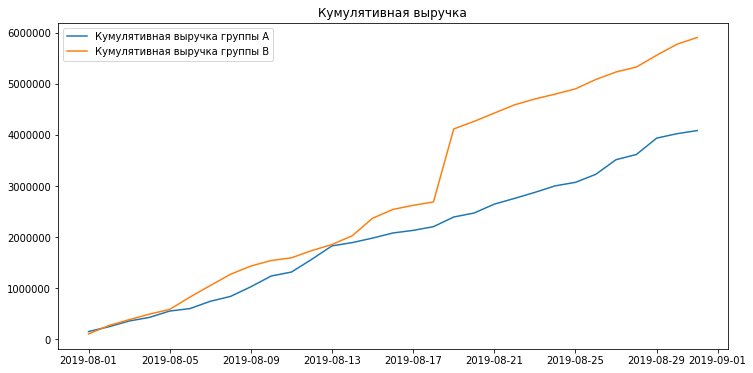

In [16]:
register_matplotlib_converters()
# Строим график выручки группы А
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка группы A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка группы B')
plt.title('Кумулятивная выручка')
plt.legend() 
plt.show()

Группа А стабильно хуже группы В по накопительной выручке за август 2019 года. Если в начале графики были максимально близки друг к другу, то ближе к середине можно наблюдать резкий рост группы В, а после также равномерное стремление вверх, как и группы А. Такой резкий взлет может быть связан с аномальными данными, так или иначе, это надо проверить.

### Построим график кумулятивного среднего чека по группам.

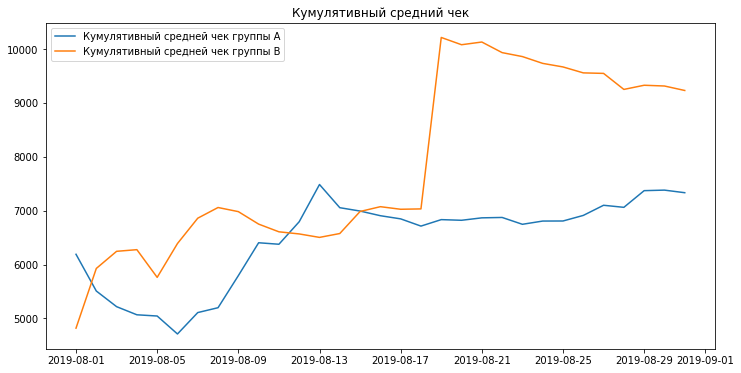

In [17]:
plt.figure(figsize = (12, 6))
plt.plot(cumulativeRevenueA['date'], 
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], 
         label='Кумулятивный средней чек группы A')
plt.plot(cumulativeRevenueB['date'], 
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], 
         label='Кумулятивный средней чек группы B')
plt.title('Кумулятивный средний чек')
plt.legend() 
plt.show()

Можно наблюдать колебания у графиков, а также тот самый безумный взлет у группы В. Такой скачок можно объяснить аномально большим заказом(заказами). Продолжаем изучать.

### Построим график относительного изменения кумулятивного среднего чека группы В к группе А.

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

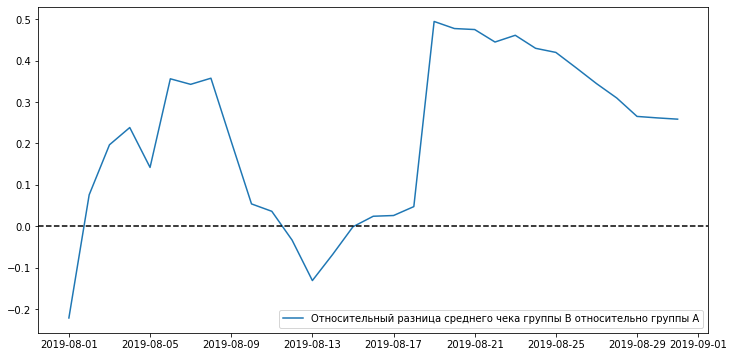

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/
          mergedCumulativeRevenue['ordersA'])-1, 
          label="Относительный разница среднего чека группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

Из данного графика можно сделать вывод, что,действительно, группа В выше по показателю среднего чека, чем группа А, но у нас все также остаются аномальные данные.

### Построим график кумулятивной конверсии по группам.

In [20]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

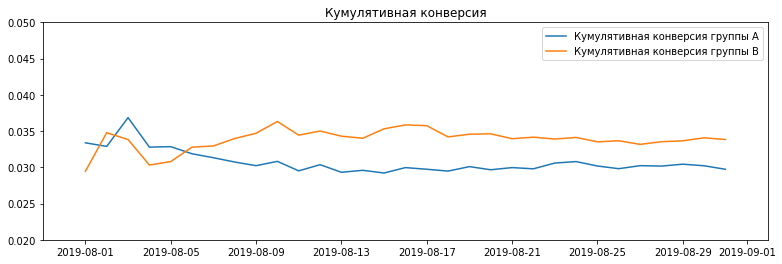

In [21]:
plt.figure(figsize = (13, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Кумулятивная конверсия группы A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Кумулятивная конверсия группы B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-07-30", '2019-09-02', 0.02, 0.05]) 

plt.title('Кумулятивная конверсия')
plt.show()

Насчет конверсии можно сказать следующее, что в начале наблюдаются небольшие колебания у обоих групп, но затем они стабилизируются и ясно видим, что группа В стабильно лучше по конверсии группы А.

### Построим график относительного изменения кумулятивной конверсии группы В к группе А.

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

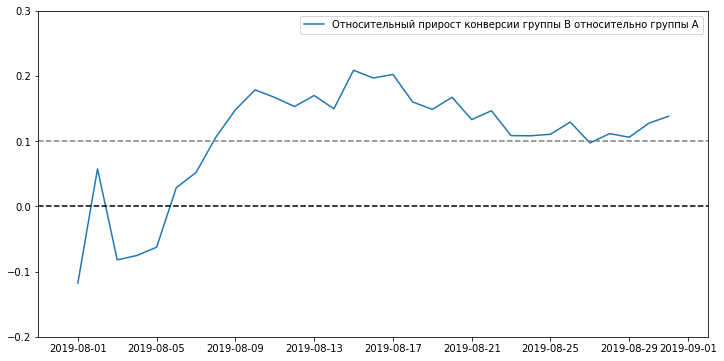

In [23]:
plt.figure(figsize = (12, 6))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-07-30', '2019-09-02', -0.2, 0.3]) 
plt.show()

На этом графике мы наглядно видим те самые колебания в начале, но после них группа В вырывается вперед и стабильно опережает группу А на 10%.

### Построим точечный график кол-ва заказов по пользователям.

In [24]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

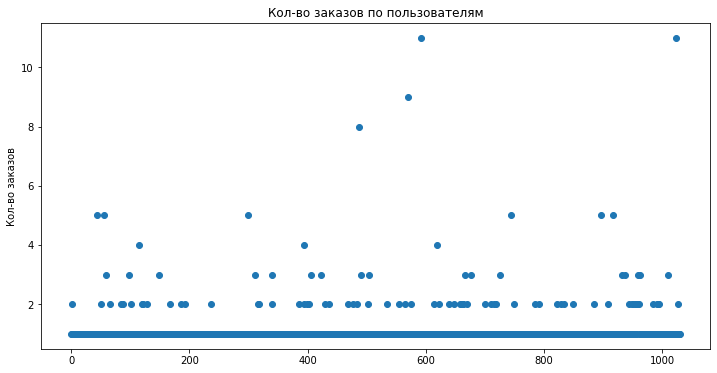

In [25]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize = (12, 6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel("Кол-во заказов")
plt.title('Кол-во заказов по пользователям')
plt.show()

На графике можно увидеть, что некоторые пользователи делали больше 10 заказов. Так как принято отсеивать от 1% до 5% наблюдений, то отнесем к аномальным пользователям тех, кто делал 4 заказа и более.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Исходя из этого, можем с максимальной уверенностью отнести к аномальным пользователям тех, кто делает 4 заказа и больше.

### Построим точечный график стоимостей заказов. 

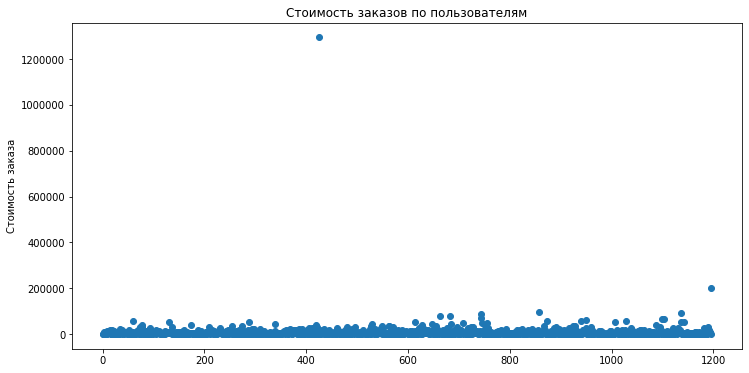

In [27]:
y_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize = (12, 6))
plt.scatter(y_values, orders['revenue']) 
plt.ylabel("Стоимость заказа")
plt.title('Стоимость заказов по пользователям')
plt.show()

Поэтому графику мало, что можно сказать, в основном стоимость заказа не превосходит 50000 тысяч рублей, а также мы можем наблюдать тот аномальный заказ на сумму более 1млн рублей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Отнесем к аномальным заказам те заказы, которые превышают 30000.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [30]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [31]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [32]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [33]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280
5,2019-08-06,15,48484,26,242342,118,598401,124,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,136,740818,148,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,152,837097,175,1270589,610,654,5239,5298
8,2019-08-09,14,188506,24,160812,166,1025603,199,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,182,1236098,222,1539203,406,369,6262,6277


- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [34]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

In [35]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

In [36]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [37]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

H0 - нулевая гипотеза: Между группами А и В отсутствуют статистические значимые различия по какому-то параметру.

H1 - альтернативная гипотеза: Наблюдается статистические значимые различия между группами А и В по какому-то параметру.

alpha = 0.05

In [38]:
print("Cтатистическая значимость: {0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

Cтатистическая значимость: 0.0168


In [39]:
print("Относительный прирост конверсии группы B к группе А: {0:.4f}"
      .format(sampleB.mean() / sampleA.mean() - 1))

Относительный прирост конверсии группы B к группе А: 0.1381


0.0168 = p-value < 0.05, следовательно, мы отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. А также конверсия группы В выигрывает на 13.8% группу А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [40]:
print('Cтатистическая значимость: {0:.4f}'
      .format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                 orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))

Cтатистическая значимость: 0.7293


In [41]:
print('Относительные различия в среднем чеке между группами: {0:.4f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительные различия в среднем чеке между группами: 0.2587


0.7293 = p-value > 0.05, следовательно, мы не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет. Однако, можем заметить, что средний чек группы В значительно больше группы А, а точнее почти на 26%.

### Перейдем к очищенным данным

In [42]:
#Зададим условия для "очищенных данных"
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId'],
    ],
    axis=0,
)

In [43]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

In [44]:
#Данные, которые не удовлетворяют нашим критериям
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [45]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [46]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [47]:
print("Cтатистическая значимость: {0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, 
                                                  alternative = 'two-sided')[1]))

Cтатистическая значимость: 0.0188


In [48]:
print("Относительный прирост конверсии группы B к группе А: {0:.4f}".
      format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Относительный прирост конверсии группы B к группе А: 0.1444


0.0188 = p-value < 0.05, следовательно, мы отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами по очищенным данным нет. А также можно заметить, что относительный прирост конверсии группы В к группе А чуть больше, чем у сырых данных.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [49]:
print(
    "Cтатистическая значимость: {0:.4}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        alternative = 'two-sided')[1]
            )
)

Cтатистическая значимость: 0.9795


In [50]:
print(
    "Относительные различия в среднем чеке между группами:  {0:.4f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Относительные различия в среднем чеке между группами:  -0.0167


0.4897 = p-value > 0.05, следовательно, мы не отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке между группами нет. Но теперь пропало превосходство группы В над группой А и теперь группа В проигрывает по среднему чеку почти в 2%, а по сырым данных она выигрывала у группы А на 26%. Однако, и в первом и во втором случае статистически значимых различий между группами по среднему чеку не наблюдалать, т.е. можно сделать вывод, что критерий Манна- Уитни не чувствителен к аномальным данным. И по очищенным данным делаем вывод, что группы практически не отличаются по значениям среднего чека.

### Принятие решения

Мы имеем следующие выводы:

Есть статистические значимое различие по конверсии между группами как по сырым данным, так и по очищенным данным.

Нету статистического значимого различия по среднему чеку между группами как по сырым данным, так и по очищенным данным.

Относительные различия в среднем чеке между группами по сырым данным равно 26% в пользу группы В, а по очищенным почти 2% в пользу группы А.

График различия конверсии между группами сообщает, что результаты группа В значительно лучше группы А. Такая тенденция сохранятся и при очистки данных от аномалий.

На основе графика различия среднего чека между группами делаем вывод, что средний чек группы В зачастую выше среднего чека группы А. Но после очистки данных, можно уверенно сказать, что разницы в среднем чеке у групп практически нет.

Поэтому, следует остановить тест и принять победу группы В над группой А.